***
# <font color=black size=10>Book de Serviços - Middleware</font>
***

# <font color=black>1 Introdução</font>
***

O intuito deste documento é preparar o dataset para sua utilização na geração de indicadores que nos possibilitarão gerar uma ampla melhoria na forma que os chamados são abertos na Orizon.

Com esses indicadores em mãos saberemos sem sombra de dúvidas, quais são os maiores problemas, o que nos possibilitará um ataque direto à sua causa raiz. Tratando assim o problema em definitivo, tornando obsoleta a necessidade de retrabalhar.

### Fonte dos Dados

Cherwell ITSM - extração mensal de todas as demandas enviadas para equipe de suporte a aplicação - Middleware


### <font color='red'>Objetivo</font>
***


> 1. Alterar o nome dos campos para que eles se tornem mais legíveis.
> 2. Eliminar os registros onde os campos <b>equipe_solicitante</b> e <b>cliente</b> são missings.
> 3. Agrupar valores diferentes para a mesma <b>equipe_solicitante</b>
> 4. Gerar um documento/playbook que facilite a tratativa destas informações,atendendo aos objetivos acima sem retrabalho, apenas clicando ctrl + f9:
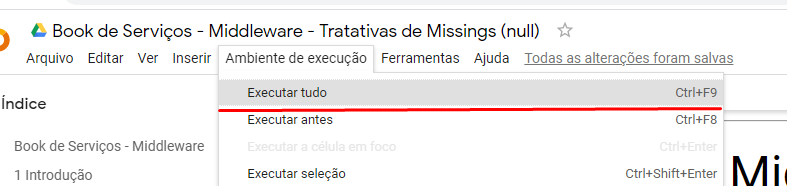



## <font color=black>1.1 Importando Libs necessárias para análise  e ajustando o dataset</font>
***
Lib(s) utilizadas:

https://pandas.pydata.org/

Após a extração do relatório do cherwell, ele deve ser disponibilizado no diretório do google drive, mantendo seu nome (base_middleware.csv):

/content/drive/MyDrive/Data_Science/Dataset_baseMiddleware/base_middleware.csv

In [ ]:
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Data_Science/Dataset_baseMiddleware/base_middleware.csv')
dados.head()

## <font color=black>1.2 Alteração dos nomes das tabelas </font>
***

Ao extrair os dados do Cherwell, alguns campos possuem uma nomenclatura técnica, as vezes até confusa. isso pode dificultar a compreensão dos dados.

Pensando nisso, este tópico trabalhará justamente nesse ponto. A idéia é facilitar a compreensão do que será mostrado.


|Campos Atualizados|
|---|
|id_solicitacao|
|assunto|
|tipo_solicitacao|
|cliente|
|categoria|                 
|subcategoria|
|produto|
|equipe_solicitante|
|equipe_proprietaria|
|status|
|dt_criacao|
|dt_fechamento|
|prazo_resolucao|
|priorizacao|
|severidade|
|descrição|



In [ ]:
dados.columns = ['id_solicitacao',
								'assunto',
								'tipo_solicitacao',
								'cliente',
								'categoria',
								'subcategoria',
								'produto',
								'equipe_solicitante',
								'equipe_proprietaria',
								'status',
								'dt_criacao',
								'dt_fechamento',
								'prazo_resolucao',
								'priorizacao',
								'severidade',
                'descrição']             

## <font color=black>1.3 Criação da função que realizara o preenchimento de campos</font>
***

Ao analisar o dataset, entendemos que havia necessidade de tratativa de algumas informações, preenchimento ou correção de alguns campos.

pensando nisso, definimos esta função que tem como intuito facilitar sua alteração


In [ ]:
# #Função que realiza o preenchimento de um determinado campo inserido como parametro   
# class PreencheCampos:
#   def __init__(self,campo,item,chamados):
#     self._campo = campo
#     self._item = item
#     self._chamados = chamados 
        

#   def preenchimento(campo,item,chamados):
#     for id in chamados:
#       dados[campo].loc[dados['id_solicitacao'] == id] = item.upper()  

    

# <font color=black>2 Tratativa de Missings</font>
***
Pra que possamos viabilizar a utilização do dataset, precisamos remover todo o tipo de 'sujeira' que possa causar interferência na geração e análise dos indicadores.

Para isso, verificaremos no dataset informações onde o campo não foi preenchido (null) e excluiremos esses dados, a princípio nos campos  <b>equipe_solicitante</b>, <b>produto</b> e <b>cliente</b>.


## <font color=black>2.1 Verificando quantidade de missings no dataset </font>
***

Antes de mais nada, precisamos verificar a quantidade de informações nulas no dataset

In [ ]:
#mostra, campo a campo, a quantidade de informações não nulas no dataset
dados.info()



## <font color=black>2.2 Excluindo missings no campo <b>equipe_solicitante</b></font>
***

In [ ]:
#seleção de informações onde a equipe solicitante é nula 
selecao = (dados['equipe_solicitante'].isnull())

#exclusão de dados onde a equipe solicitante é nulo 
dados = dados[~selecao]


#######provisorio - remove chamados cancelados#######
#cancelados = [282935,281461,271886,273863,278915,271282,277732,279176,275362,277929,281733,270101,270419,270910,271678,271699,275585,275947,276975,277732,278342,278596]
#for id in cancelados:
#  selecao = (dados['id_solicitacao'] == id)
#  dados = dados[~selecao]


## <font color=black>2.3 Preenchendo informações nulas no campo <b>cliente</b></font>
***

### <font color=black>2.3.1  <b>BRADESCO</b></font>
***


In [ ]:
PreencheCampos.preenchimento('cliente','bradesco',[289949,290652,287181,287266,287384,287843,287855,288003,288075,288536,289005,289295,289329,284776,284782,284783,284348,284349,284352,284522,283612,283616,283563,283573,282912,282837,282845,282696,282537,282391,282353,282569,267305,267456,267464,267634,267644,267648,267687,267707,267709,267818,267823,267883,267886,267976,267991,268045,268330,268333,268337,268365,268369,268388,268417,268438,268443,268479,268507,268596,268598,268614,268618,268802,268812,268823,268837,268855,268919,269015,269021,269050,269137,269138,269139,269141,269142,269143,269145,269146,269214,269215,269222,269223,269224,269225,269229,269237,269238,269241,269242,269243,269271,269284,269361,269374,269390,269402,269481,269588,269611,269643,269645,269789,269828,269944,269962,270101,270264,270306,270310,270419,270446,270478,270583,270613,270659,270702,270704,270706,270708,270712,270797,270992,271065,271328,271361,271369,271534,271559,271691,271699,271710,271714,271722,271886,271948,271949,271950,271951,271953,271954,271955,271956,272057,272280,272281,272282,272312,272580,272650,272657,272675,272676,272677,272782,272815,272951,273088,273347,273356,273380,273389,273402,273462,273494,273527,273576,273863,273956,273988,274094,274115,274139,274261,274386,274434,274453,274549,274576,274634,274648,274672,274675,274676,274932,274939,274943,274944,274947,274949,274950,274960,274972,274974,275023,275153,275179,275190,275191,275192,275194,275195,275197,275199,275201,275248,275298,275302,275315,275334,275362,275414,275504,275531,275606,275652,275672,275699,275802,275903,275947,275966,276041,276052,276053,276089,276147,276194,276266,276310,276337,276339,276348,276463,276575,276579,276662,276789,276937,276970,277032,277050,277063,277069,277119,277204,277278,277291,277332,277362,277496,277624,277643,277646,277689,277699,277788,277794,277924,277972,277979,277999,278001,278004,278008,278010,278029,278060,278064,278066,278067,278068,278069,278073,278106,278178,278214,278369,278462,278561,278588,278596,278626,278651,278846,278864,278865,278866,278915,278922,278952,278994,279121,279156,279160,279162,279164,279180,279251,279254,279256,279258,279260,279262,279264,279268,279293,279298,279356,279412,279429,279506,279519,279675,279688,279891,279909,279910,279922,279928,279930,279962,280013,280048,280079,280095,280123,280164,280168,280182,280204,280208,280209,280326,280411,280458,280562,280567,280651,280663,280782,280797,280822,280887,280909,280939,280946,281040,281234,281427,281521,281568,281574,281600,281606,281669,281700,281703,281704,281715,281723,281778,281781,281782,281881,281882,281890,281893,281895,281896,281925,281928,281990])

### <font color=black>2.3.2  <b>ORIZON</b></font>
***


In [ ]:
PreencheCampos.preenchimento('cliente','orizon',[291029,289538,289682,290451,290646,290659,290313,290456,277929,285047,285246,285368,285969,286677,287276,287476,287856,287863,287978,287996,288386,288617,288658,289283,284728,284176,284034,282928,283019,282960,282727,282727,282812,282695,282287,282381,282342,267836,267866,268116,268301,268308,268331,268490,268750,268806,269066,269079,269125,269252,269256,269520,269554,269714,269956,270068,270069,270128,270282,270475,270494,270514,270825,270923,271094,271104,271282,271317,271393,271491,271623,271678,271775,271799,271900,272490,272777,272968,273253,273416,273770,274077,274141,274413,274483,275300,275359,275371,275402,275411,275417,276191,276319,276320,277120,277271,277445,277706,277732,278052,278116,278405,278469,278820,279176,279187,279367,279402,280086,280185,281043,281760,281922])

### <font color=black>2.3.3  <b>CASSI</b></font>
***


In [ ]:
PreencheCampos.preenchimento('cliente','cassi',[291155,290035,290474,290514,290515,287268,287502,287589,287870,288017,288152,288602,288630,289339,289340,284959,283646,283570,282945,282800,282851,282673,267364,267635,267666,268125,268397,268481,269009,269010,269960,270130,270313,270507,271715,271779,271808,271834,272009,272151,272153,272160,272161,272171,272182,272186,272558,272641,272703,272762,272766,273012,273020,273022,273307,273448,273979,274015,274153,274222,274547,274764,275306,275466,275621,275716,275721,276004,276028,276030,276031,276037,276740,277047,277057,277059,277065,277100,277101,277103,277104,277105,277106,277329,277449,277510,277727,277729,278015,278138,278359,278361,278427,278490,278604,278647,278771,278781,278924,278928,279120,279138,279168,279211,279212,279340,279455,279456,279475,279549,279596,279997,280030,280315,280412,280757,280791,281088,281412,281609,281711,281766,281774,281926,281932,281947,281977,282074])    

### <font color=black>2.3.4  <b>CABESP</b></font>
***


In [ ]:
PreencheCampos.preenchimento('cliente','CABESP',[290674,287121,287537,287549,287864,288303,288515,288614,288643,288646,288655,288942,284765,284285,284301,283575,282706,267352,267751,267767,268113,268208,268219,268620,269273,269721,270047,270070,270217,270389,270506,270557,270569,270865,270999,271323,271337,271347,271372,271638,271640,271643,271702,271723,271999,272108,272112,272121,272224,272545,272655,272697,273133,273137,273146,273444,273595,273728,273944,274024,274384,274441,274554,274684,274748,274826,274921,274931,275326,275329,275413,275434,275660,275799,275898,276076,276189,276297,276528,276718,276918,276975,277052,277148,277205,277447,277488,277490,277619,277678,277805,277818,277874,278039,278218,278222,278397,278776,278968,279177,279248,279250,279297,279301,279838,279880,280041,280054,280274,280424,280738,280931,280942,280950,281146,281313,281572,281586,281613])  

### <font color=black>2.3.5  <b>LIFE EMPRESARIAL</b></font>
***


In [ ]:
PreencheCampos.preenchimento('cliente','LIFE EMPRESARIAL',[290591,287237,272941,283445,277048,267859,270910,270975,271331,275506,276314] )  

### <font color=black>2.3.6  <b>ALLIANZ</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','ALLIANZ',[290069,282967,269820,271474,275423,275535,279139] )  

### <font color=black>2.3.7  <b>SULAMERICA</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','SULAMERICA',[290338,290431,289286,284726,284089,283790,268135,268361,268420,268506,268747,269975,270278,270716,271709,275325,275483,275585,275696,276673,277092,277323,277786,278548,281562,282054])  

### <font color=black>2.3.8  <b>AFRESP</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','AFRESP',[287428,287477,287483,288342,288657,289364,282716,282668,267525,268067,268897,269112,269350,269571,270045,270562,270575,270579,270794,270935,271050,271454,271604,271684,271898,272120,272125,272418,272513,272612,273085,273186,273297,274169,274220,274536,274629,275224,275383,275431,277170,278353,278414,278525,278770,278795,279744,279752,280160,280328,280957,282048])  

### <font color=black>2.3.9  <b>CAFAZ</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','CAFAZ',[290322,245078,245216,252760,252927,253074,258666] )

### <font color=black>2.3.10  <b>ECONOMUS</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','ECONOMUS',[287399,271316,272133,272417,274681])  

### <font color=black>2.3.11  <b>MEDISERVICE</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','MEDISERVICE',[290904,284414,268228,268911,268912,269289,269449,269655,270843,271011,271521,272556,272717,272809,273827,274103,274390,274746,274796,275673,276029])  

### <font color=black>2.3.12  <b>SEGUROS UNIMED</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','SEGUROS UNIMED',[283753,277480,267520,271280,276025,276459,280156])  

### <font color=black>2.3.13  <b>NOTREDAME</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','NOTREDAME',[290113,290594,276910,269798,269818,274605])    

### <font color=black>2.3.14  <b>ABBERTA</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','ABERTTA',[274241,276198,284609,286483,286588,286942,287327,289817])     

### <font color=black>2.3.15  <b>OMINT</b></font>
***

In [ ]:
PreencheCampos.preenchimento('cliente','OMINT',[288645,282935,244475])   

### <font color=black>2.3.16  <b>ASFEB</b></font>

In [ ]:
PreencheCampos.preenchimento('cliente','ASFEB',[270736,273799,274970,275698,275709,277082])

### <font color=black>2.3.17  <b>HOSPITAU</b></font>

In [ ]:
PreencheCampos.preenchimento('cliente','HOSPITAU',[290673,290636,287997,288459,289211,289309,283598,274612,275173,275820,276322])

### <font color=black>2.3.19  <b>*TPA*</b></font>

In [ ]:
PreencheCampos.preenchimento('cliente','TPA',[279236,268502,270000,270059,270261,270452,270871,287267,288973,283322]) 

## <font color=black>2.4 Preenchendo informações nulas no campo <b>produto</b></font>
***

### <font color=black>2.4.1  <b>Fature</b></font>
***

In [ ]:
PreencheCampos.preenchimento('produto','FATURE',[290947,291029,291087,289538,289583,289682,289716,289746,289747,289817,289879,289904,289944,289949,289956,289994,290008,290018,290035,290062,290066,290070,290077,290099,290113,290117,290121,290137,290171,290183,290262,290276,290310,290322,290338,290402,290431,290474,289899,289945,290149,290150,290618,290591,290652,290659,290673,290594,290904,289899,289945,290149,290150,290591,290594,267520,267634,267635,267666,267818,267859,267886,268045,268113,268125,268135,268208,268331,268333,268337,268361,268365,268388,268420,268438,268443,268490,268502,268506,268507,268598,268614,268747,268823,268855,268919,269010,269066,269079,269125,269137,269138,269139,269141,269142,269143,269145,269146,269214,269222,269223,269224,269225,269229,269237,269238,269241,269242,269243,269252,269256,269374,269402,269449,269655,269714,269798,269818,269820,269828,269960,269975,270000,270059,270068,270069,270101,270128,270130,270217,270261,270278,270282,270306,270310,270419,270446,270452,270475,270507,270557,270583,270613,270702,270704,270706,270708,270712,270716,270736,270797,270871,270910,271065,271094,271104,271280,271316,271361,271369,271474,271534,271559,271678,271699,271710,271715,271722,271799,271808,271834,271948,271949,271950,271951,271953,271954,271955,271956,272009,272057,272112,272125,272133,272151,272153,272160,272161,272171,272182,272186,272224,272280,272281,272282,272417,272418,272490,272545,272558,272580,272657,272675,272676,272677,272703,272762,272766,272815,273012,273020,273022,273137,273307,273389,273416,273444,273448,273462,273576,273728,273770,273799,273827,273944,273956,274015,274077,274115,274141,274153,274222,274241,274261,274386,274413,274434,274453,274547,274549,274576,274605,274629,274634,274684,274764,274826,274943,274970,275023,275153,275190,275191,275192,275194,275195,275197,275199,275201,275248,275298,275300,275302,275306,275315,275325,275334,275371,275402,275411,275413,275434,275483,275504,275535,275585,275652,275672,275696,275698,275709,275716,275799,275947,276004,276025,276041,276198,276320,276337,276339,276459,276463,276575,276673,276740,276886,276910,276937,276975,277048,277069,277082,277092,277104,277170,277259,277278,277323,277329,277362,277449,277480,277488,277490,277646,277689,277699,277786,277979,277980,278004,278008,278010,278029,278052,278060,278064,278066,278067,278068,278069,278073,278138,278178,278214,278342,278353,278359,278361,278369,278414,278427,278469,278548,278596,278626,278647,278771,278781,278846,278864,278865,278866,278903,278924,278928,278952,278994,279121,279139,279156,279160,279162,279164,279211,279236,279251,279254,279256,279258,279260,279262,279264,279268,279293,279298,279301,279340,279402,279412,279675,279688,279891,279909,279910,279922,279928,279930,279962,279997,280013,280048,280079,280086,280095,280156,280182,280185,280204,280208,280209,280348,280411,280424,280458,280663,280757,280791,280797,280822,280851,280866,280950,281040,281188,281234,281412,281461,281521,281562,281568,281574,281586,281606,281613,281669,281704,281760,281766,281778,281782,281890,281893,281896,281925,281928,281947,282223,282224,282226,282261,282287,282297,282310,282314,282342,282353,282569,282673,282722,282787,282799,282851,282935,282945,283217,283317,283322,283445,283463,283612,283662,283748,283753,283790,283830,283844,283850,283897,283905,283906,283907,283908,283909,283961,283963,283987,283994,283999,284002,284027,284034,284044,284052,284072,284089,284090,284146,284184,284285,284449,284522,284609,284616,284622,284726,284728,284750,284776,284782,284783,284854,284874,284894,284903,284904,284907,284920,284933,285016,285029,285047,285107,285146,285185,285186,285331,285351,285397,285969,286024,286282,286283,286288,286290,286297,286307,286327,286328,286330,286335,286342,286344,286347,286389,286459,286483,286588,286603,286672,286677,286730,286798,286821,286844,286855,286878,286881,286918,286926,286927,286942,286950,286978,286982,286999,287061,287073,287075,287077,287237,287267,287276,287327,287384,287446,287476,287536,287537,287549,287589,287776,287843,288003,288017,288239,288241,288243,288246,288260,288264,288271,288386,288450,288455,288457,288515,288536,288602,288630,288942,288973,289005,289021,289061,289250,289286,289339,289340,289417,289424]) 

### <font color=black>2.4.2  <b>Autorize</b></font>
***

In [ ]:
PreencheCampos.preenchimento('produto','AUTORIZE',[291057,291155,289657,289734,289780,289806,290069,289830,289895,290313,290456,290515,290086,290132,290555,290636,290674,290440,290514,290516,290646,289799,289806,290069,290313,290456,290515,290555,290636,290674,267364,267525,267644,267648,267687,267707,267709,267866,267976,267991,268067,268228,268301,268369,268479,268481,268618,268802,268837,268897,268912,269009,269015,269021,269050,269956,270047,270264,270313,270659,270843,270992,271393,271521,271604,271623,271709,271714,271779,272556,272641,272655,272717,272809,272968,273088,273253,273494,273595,273979,274024,274094,274384,274483,274536,274612,274676,274681,274746,274796,274944,274947,274949,274972,274974,275173,275326,275362,275414,275423,275506,275531,275606,275660,275721,275820,276028,276030,276031,276037,276297,276322,277047,277057,277059,277065,277100,277101,277103,277105,277106,277271,277409,277510,277669,277727,277729,277794,277929,277999,278015,278137,278218,278405,278490,278561,278604,278795,278832,278857,279120,279138,279168,279187,279212,279297,279455,279456,279475,279549,279591,279744,279752,279914,280041,280168,280200,280212,280274,280315,280412,280690,280939,281088,281579,281609,281685,281711,281723,281733,281774,281777,281781,281882,281895,281926,281932,281977,282074,282213,282356,282379,282381,282537,282677,282695,282716,282800,282912,282927,282928,282967,283019,283212,283468,283563,283570,283573,283575,283585,283598,283616,283646,283657,283874,283986,284003,284301,284348,284349,284414,284780,284922,284959,285027,285101,285131,285243,285246,285368,285395,285590,285595,285611,285612,285809,285843,285859,285916,285921,285931,285936,285985,285990,286067,286107,286121,286190,286194,286254,286315,286619,286781,287050,287121,287268,287399,287428,287483,287502,287856,287863,287870,287996,287997,288075,288152,288378,288459,288614,288643,288645,288655,288657,289211,289283,289309,289329])

### <font color=black>2.4.3  <b>BPO</b></font>
***

In [ ]:
PreencheCampos.preenchimento('produto','BPO',[289386,290451,287864,282842,280887,284095,271011,276029,269271,282727,282706,282739,282220,282222,282363,282407,282491,267305,267767,267883,268308,268596,268806,268911,269215,269284,269289,269390,269588,269643,269789,269944,270825,270975,271282,271317,271331,271491,271643,271691,272108,272941,273527,274103,274390,274648,274931,274939,275179,275359,275417,275673,275699,275802,276052,276053,276147,276191,276266,276310,276314,276319,276528,276662,277204,277332,277496,277619,277643,277706,277732,277770,278106,278539,278820,278915,278922,279176,279177,279248,279359,279429,279519,279540,279880,279893,280164,280326,280738,280782,280931,280937,280942,280946,281146,281313,281703,281922])  

### <font color=black>2.4.4  <b>Analise</b></font>
***

In [ ]:
PreencheCampos.preenchimento('produto','analise',[290458,268750,269481,269520,269554,271775,271886,272312,273863,273988,276789,277032,277120,278462,279356,279367,281043,281715,281990,282665,282960,283020,283257,283991,286169,286329,286776,287365,288658])  

### 2.4.5 <b>Autorize Premium</b> 
***


In [ ]:
PreencheCampos.preenchimento('produto','AUTORIZE PREMIum', [284227,282594,273297,274950,274960,268397,270579,275466,281881])  

### 2.4.6 <b>Fature Imagem</b> 
***

In [ ]:
PreencheCampos.preenchimento('produto','FATURE IMAGEM',[287967,282812,284352,278597,277063,277050,273380,282246,267464,267823,267836,268116,269361,269611,275966,281427,282391])  

### 2.4.7 <b>Fature Auditado</b> 
***

In [ ]:
PreencheCampos.preenchimento('produto','FATURE AUDITADO',[268417,268812,270923,270935,271900,274139,277291,284954,285144,287431])  

### 2.4.8 <b>Fature Premium</b> 
***

In [ ]:
PreencheCampos.preenchimento('produto','FATURE PREMIUM',[289560,289664,289751,289909,289983,290341,267352,267456,267751,268219,268620,269112,269273,269350,269571,269645,269721,269962,270045,270070,270389,270478,270494,270506,270562,270569,270575,270794,270865,270999,271050,271323,271328,271337,271347,271372,271454,271638,271640,271684,271702,271723,271898,271999,272120,272121,272513,272612,272650,272697,272777,272782,272951,273085,273133,273146,273186,273347,273356,273402,274169,274220,274441,274554,274672,274675,274748,274921,274932,275224,275329,275383,275431,275621,275898,275903,276076,276089,276189,276194,276348,276579,276718,276918,276970,277052,277119,277148,277205,277445,277447,277624,277678,277788,277805,277818,277874,277924,277972,278001,278039,278116,278222,278397,278525,278569,278588,278651,278770,278776,278968,279180,279250,279506,279838,280054,280123,280160,280328,280562,280567,280651,280957,281572,281600,281700,282048,282263,282668,282696,282845,283081,283187,283321,283453,283822,283939,284222,284765,284930,285170,285188,285191,285192,285215,285225,285230,285354,285607,285806,285826,285918,286275,286384,286449,286573,286924,286949,286957,287181,287266,287358,287363,287477,287497,287855,288025,288248,288303,288342,288646,289029,289273,289295,289325,289364,289405,289406])

### 2.4.9 <b>Frente Automatizada</b> 
***

In [ ]:
PreencheCampos.preenchimento('produto','FRENTE AUTOMATIZADA',[270514])  

## <font color=black> Estado do dataset após a tratativa </font>
***

Podemos ver que nesse processo de limpeza perdemos varios registros que poderiam nos gerar um resultado mais preciso caso tivessem sido preenchidas corretamente. 

A tendencia é que, com a melhoria nos processos de abertura de demandas, esse problema aconteça cada vez menos, até ser irrelevante e quem sabe até não mais ocorrer.








In [ ]:
#após tratativa
dados.info()

<i>PS: após realizar atualização nas tratatativas dos campos <b>cliente</b> e <b>produto</b>, houve uma redução drástica na quantidade de registros excluídos </i>

# 3 Alteração de valores em campos do Dataset 
***

Alguns campos são necessários para geração de indicadores, porém a forma que são preenchidos inviabiliza sua utilização.


Para resolver este problema, neste tópico realizaremos tratativa de algumas informações.

## 3.1 Alteração de valores do campo <b>priorizado</b>
***

O Campo <b>priorizado</b> comummente é preenchido de forma numérica, com os números indicando a posição na priorização. Para gerar os indicadores, precisamos apenas saber se ele é ou não priorizado.

Neste caso, vamos alterar os valores para que sejam 0 (zero) caso não sejam priorizados e 1 (um) caso sejam.

In [ ]:
#Alteração dos valores de priorização para que sejam categorizados em True ou False
#dados['priorizacao'].where(dados['priorizacao'] < 1 , 1,inplace=True)



# 4 Agrupando Equipes
***

Analisando o dataset, identificamos que muitas vezes, a mesma equipe é representada de varias formas diferentes, por exemplo: pos-vendas (todo minusculo) e Pos-vendas (com o 'P' maiusculo)

Esse tópico trata da solução para este problema


##  Dados Pré tratativa
***

In [ ]:
#dados['equipe_solicitante'].value_counts()

## Agrupamentos
***


### 4.2 Grupo <b>Pós-Venda</b>
***

Grupo formado pelas equipes:

|Pós-Venda|
|---|
|Pós-Venda|
|Pós-venda|
|Pós-Venda Bradesco Saude RJ|
|Pos-venda Bradesco Saude rj|
|Pós-Venda Bradesco Saúde|
|Back Office Operadoras|
|Caixa departamento|
|Equipe de Vendas|
|Pré-Venda|
|Pos-venda|
|Pos-venda Bradesco Saude|
|Inteligência Tecnica|
|Analise de Negocios rj|
|Análise de Negócios RJ|
|Temporários|
|Pessoas e Gestao (Jovem)|



In [ ]:

# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pós-Venda'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pós-venda'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pós-Venda Bradesco Saude RJ' ] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pós-Venda Bradesco Saúde'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Caixa departamento'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Equipe de Vendas'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pré-Venda'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pre-venda'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pos-venda'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pos-venda Bradesco Saude'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Inteligência Tecnica'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pos-venda Bradesco Saude rj' ] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Analise de Negocios rj' ] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Análise de Negócios RJ'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Temporários'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Temporarios'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Analise de Negocios'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pos-Venda'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pos-Venda Bradesco Saude'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pos-Venda Bradesco Saude RJ'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pessoas e Gestao (Jovem)'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'POS-VENDA'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'POS-VENDA BRADESCO SAUDE'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'POS-VENDA BRADESCO SAUDE RJ'] = 'PÓS-VENDA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'PRE-VENDA'] = 'PÓS-VENDA'

### 4.3 Grupo <b>BPO</b>
***

Grupo formado pelas equipes:

|BPO|
|---|
|BPO Life Empresarial Operação|
|Superint. BPO Processamento|
|Bvp Back Office|
|BVP Back Office|
|BVP BackOffice|
|Back Office Operadoras|
|Gestão Esteiras|
|SADT Imagem Filial SP|
|Conciliação Eletrônico|
|SCAM Reembolso SP|
|Célula de Recepção|
|Monitoramento de Qualidade|
|SCAM Reembolso RJ|
|Apoio Logístico Medservice|
|Conciliação Eletronico|
|BPO Consulta Bradesco|
|Esteira de Processamento Bradesco|
|Call Center|
|Célula de Digitalização|
|Esteira de Processamento Sulamérica|
|Pessoas e Gestão RJ|
|Gestão Contas Médicas SP|
|QA Contas Médicas RJ|
|ACP Estipulante RJ|
|Inteligência Médica|
|Contas Médicas SADT Filial RJ|
|Contas Médicas HP Filial RJ|
|BPO Consulta Bradesco|
|Bpo Gestao - Gestao Contas Medicas - Barueri|
|Celula de Digitalizacao|
|Contas Medicas hp Filial rj|
|Gestao Esteiras|                                   
|Sadt Imagem|
|Controle E Monit. Operacional rj|
|BPO Gestao - Gestao Contas Medicas - Barueri|
|Bpo Consulta Bradesco|
|Sadt Imagem Filial Sp|
|Conciliacao Eletronico|
|Recepcao|
|qa Contas Medicas rj|

In [ ]:
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'BPO Life Empresarial Operação'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Superint. BPO Processamento'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Bvp Back Office'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'BVP Back Office'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'BVP BackOffice'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Gestão Esteiras'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'SADT Imagem Filial SP'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Conciliação Eletrônico'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'SCAM Reembolso SP'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Célula de Recepção'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Monitoramento de Qualidade'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'SCAM Reembolso RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Apoio Logístico Medservice'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Conciliação Eletronico'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'BPO Consulta Bradesco"'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Esteira de Processamento Bradesco'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Call Center'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Célula de Digitalização'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Esteira de Processamento Sulamérica'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pessoas e Gestão RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Gestão Contas Médicas SP'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'QA Contas Médicas RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'ACP Estipulante RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Inteligência Médica'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Contas Médicas SADT Filial RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Contas Médicas HP Filial RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'BPO Consulta Bradesco'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Controle e Monitoramento Operacional SP'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Bpo Gestao - Gestao Contas Medicas - Barueri'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Celula de Digitalizacao'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Contas Medicas hp Filial rj'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Gestao Esteiras'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Sadt Imagem'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Controle E Monit. Operacional rj'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'BPO Gestao - Gestao Contas Medicas - Barueri'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Bpo Consulta Bradesco'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Sadt Imagem Filial Sp'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Conciliacao Eletronico'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Recepcao'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Contas Medicas Sadt Filial rj'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'qa Contas Medicas rj'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Rede Opme Bradesco'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Comunicacao e Gestao Da Marca'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Contas Medicas Sadt Filial RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Controle e Monit. Operacional RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Contas Medicas Sadt Filial Rj'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Superint. Operacoes sp'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Acp Estipulante rj'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Pessoas e Gestao RJ (Jovem)'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'CONTAS MEDICAS SADT FILIAL RJ'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'BVP BACK OFFICE'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'CALL CENTER'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'SADT IMAGEM'] = 'BPO'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'CELULA DE DIGITALIZACAO'] = 'BPO'


### 4.4 Grupo <b>alarmes_automaticos</b>
***

Grupo formado pelas equipes:

|alarmes_automaticos|
|---|
|Monitoramento|
|Infraestrutura Produção|
|Infraestrutura Corporativa|
|Operações de TI|

In [ ]:
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Monitoramento'] = 'ALARMES AUTOMÁTICOS'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Infraestrutura Produção'] = 'ALARMES AUTOMÁTICOS'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Infraestrutura Corporativa'] = 'ALARMES AUTOMÁTICOS'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Operações de TI'] = 'ALARMES AUTOMÁTICOS'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Operacoes de Ti'] = 'ALARMES AUTOMÁTICOS'


### 4.5 grupo <b>arquitetura_ti</b>
***

Grupo formado pelas equipes:

|arquitetura_ti|
|---|
|Arquitetura de TI|
|Superint. de Arquitetura, Dados e Governança|

In [ ]:
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] ==  'Arquitetura de TI',] = 'ARQUITETURA - TI'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] ==  'Superint. de Arquitetura, Dados e Governança'] = 'ARQUITETURA - TI'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] ==  'Arquitetura de ti'] = 'ARQUITETURA - TI'


### 4.6 grupo <b>NIMA</b>
***

Grupo formado pelas equipes:

|NIMA|
|---|
|Fature Auditado|
|Superint. Inteligencia Tecnica|
|Inteligencia Tecnica|

In [ ]:
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Fature Auditado'] = 'NIMA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Superint. Inteligencia Tecnica'] = 'NIMA'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Inteligencia Tecnica'] = 'NIMA'





### 4.7 Grupo <b>OPME</b>
***

Grupo formado pelas equipes:

|OPME|
|---|
|Gerencia OPME Seguros|
|Cadastro OPME Alphaville|
|Rede OPME Sulamérica|
|Gerencia Opme E Seguros|
|Gerencia OPME E Seguros||

In [ ]:
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Gerencia OPME Seguros'] = 'OPME'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Cadastro OPME Alphaville'] = 'OPME'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Rede OPME Sulamérica'] = 'OPME'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Gerencia OPME E Seguros'] = 'OPME'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Gerencia Opme E Seguros'] = 'OPME'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Redes Opme'] = 'OPME'




### 4.8 Grupo <b>QA/DEV</b>
***

Grupo formado pelas equipes:

|QA/DEV|
|---|
|Terceiros|
|Desenvolvimento de Sistemas|

In [ ]:
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Terceiros'] = 'QA/DEV'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Desenvolvimento de Sistemas'] = 'QA/DEV'

### 4.9 Grupo <b>Produtos</b>
***

Grupo formado pelas equipes:

|Produtos|
|---|
|Escritório de Projetos|
|Produtos|

In [ ]:
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Escritório de Projetos',] = 'PRODUTOS'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Produtos'] = 'PRODUTOS'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Escritorio de Projetos'] = 'PRODUTOS'



### 4.10 Grupo <b>BackOffice Prestadores</b>
***

Grupo formado pelas equipes:

|Back Office Prestadores|
|---|
|Back Office Prestadores|

In [ ]:
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Back Office Prestadores',] = 'BACKOFFICE PRESTADORES'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Back Office Operadoras'] = 'BACKOFFICE PRESTADORES'
# dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'BACK OFFICE PRESTADORES'] = 'BACKOFFICE PRESTADORES'


### 4.11 Grupo <b>GOVERNANÇA TI</b>

In [ ]:
#dados['equipe_solicitante'].loc[dados['equipe_solicitante'] == 'Governanca de ti',] = 'GOVERNAÇA DE TI'

## Dados pós tratativa 
***

In [ ]:
#dados['equipe_solicitante'].value_counts()

# 5 Agrupando Produtos
***

identificamos que muitas vezes, o mesmo produto é representada de varias formas diferentes, por exemplo: <b>BPO-Cabesp</b> e <b>BPO-Cabesp\r\nBPO-Mediservice</b> 

Esse tópico trata da solução para este problema

## Dados Pré tratativa
***

In [ ]:
dados['produto'].value_counts()

## 5.2 Produto <b>BPO</b>
***



|PRODUTOS|
|---|
|BPO-Cabesp|
|BPO-Bradesco|
|BPO-BVP|
|BPO-Mediservice|
|Aviso de Sinistro|
|BPO-Cabesp\r\nBPO-Mediservice|
|Aviso de Sinistro\r\nBPO-BVP|
|BPO-Cabesp\r\nFature|
|BPO-Bradesco\r\nBPO-Cabesp\r\nBPO-Economus\r\nBPO-Fapes\r\nBPO-Life\r\nBPO-Mediservice|
|BSP|
|BPO-Bradesco\r\nBPO-Fapes\r\nBPO-Life|
|Analise\r\nBPO-Bradesco|
|BPO-Mediservice\r\nFature|

In [ ]:
# dados['produto'].loc[dados['produto'] == 'BPO-Cabesp'] = 'BPO'
# dados['produto'].loc[dados['produto'] == 'BPO-Bradesco'] = 'BPO'
# dados['produto'].loc[dados['produto'] == 'BPO-BVP'] = 'BPO'
# dados['produto'].loc[dados['produto'] == 'BPO-Mediservice'] = 'BPO'
# dados['produto'].loc[dados['produto'] == 'Aviso de Sinistro'] = 'BPO'
# dados['produto'].loc[dados['produto'] == 'BSP'] = 'BPO'
# dados['produto'].loc[dados['produto'] == 'BPO-Life'] = 'BPO'
# dados['produto'].loc[dados['produto'] == 'Site Institucional'] = 'BPO'









# #trata '\'' como caracter
# raw_BPOCabespBPOMediservice= r'BPO-Cabesp\r\nBPO-Mediservice'
# dados['produto'].loc[dados['produto'] == raw_BPOCabespBPOMediservice] = 'BPO'

# #trata '\' como caracter
# raw_AvisodeSinistroBPOBVP= r'Aviso de Sinistro\r\nBPO-BVP'
# dados['produto'].loc[dados['produto'] == raw_AvisodeSinistroBPOBVP] = 'BPO'

# #trata '\' como caracter
# raw_BPOCabespFature= r'BPO-Cabesp\r\nFature'
# dados['produto'].loc[dados['produto'] == raw_BPOCabespFature] = 'BPO'

# #trata '\' como caracter
# raw_BPOBradescoBPOCabespBPOEconomusBPOFapesBPOLifeBPOMediservice = r'BPO-Bradesco\r\nBPO-Cabesp\r\nBPO-Economus\r\nBPO-Fapes\r\nBPO-Life\r\nBPO-Mediservice'
# dados['produto'].loc[dados['produto'] == raw_BPOBradescoBPOCabespBPOEconomusBPOFapesBPOLifeBPOMediservice] = 'BPO'

# #trata '\' como caracter
# raw_BPOBradescoBPOFapesBPOLife = r'BPO-Bradesco\r\nBPO-Fapes\r\nBPO-Life'
# dados['produto'].loc[dados['produto'] == raw_BPOBradescoBPOFapesBPOLife] = 'BPO'

# #trata '\' como caracter
# raw_AnaliseBPOBradesco = r'Analise\r\nBPO-Bradesco'
# dados['produto'].loc[dados['produto'] == raw_AnaliseBPOBradesco] = 'BPO'

# #trata '\' como caracter
# raw_BPOMediserviceFature = r'BPO-Mediservice\r\nFature'
# dados['produto'].loc[dados['produto'] == raw_BPOMediserviceFature] = 'BPO'


# #trata '\' como caracter
# raw_BPOBradescoBPOCabespBPOFapesBPOLifeBPOMediservice = r'BPO-Bradesco\r\nBPO-Cabesp\r\nBPO-Fapes\r\nBPO-Life\r\nBPO-Mediservice'
# dados['produto'].loc[dados['produto'] == raw_BPOBradescoBPOCabespBPOFapesBPOLifeBPOMediservice] = 'BPO'

# #trata '\' como caracter
# raw_BPOBradescoBPOMediservice = r'BPO-Bradesco\r\nBPO-Mediservice'
# dados['produto'].loc[dados['produto'] == raw_BPOBradescoBPOMediservice] = 'BPO'

# #trata '\' como caracter
# raw_AvisodeSinistrornrnBPOBVP = r'Aviso de Sinistro\r\n\r\nBPO-BVP'
# dados['produto'].loc[dados['produto'] == raw_AvisodeSinistrornrnBPOBVP] = 'BPO'





## 5.3 Produto <b>Autorize</b>
***

|PRODUTOS|
|---|
|Autorize\r\nFature|
|Autorize\r\nAutorize Premium|
|Autorize Premium\r\nAutorize Premium|




In [ ]:
# #trata '\' como caracter
# raw_AutorizeFature= r'Autorize\r\nFature'
# dados['produto'].loc[dados['produto'] == raw_AutorizeFature] = 'Autorize'

## 5.4 Produto <b>FATURE</b>
***

|PRODUTOS|
|---|
|Fature\r\nFature Auditado|

In [ ]:
# #trata '\' como caracter
# raw_FatureFatureAuditado = r'Fature\r\nFature Auditado'
# dados['produto'].loc[dados['produto'] == raw_FatureFatureAuditado] = 'Fature'

# #trata '\' como caracter
# raw_BPOBradescornFature = r'BPO-Bradesco\r\nFature'
# dados['produto'].loc[dados['produto'] == raw_BPOBradescornFature] = 'FATURE'

## 5.5 Produto <b>AUTORIZE PREMIUM</b>
***

|PRODUTOS|
|---|
|Autorize Premium\r\nFature|

In [ ]:
# #trata '\' como caracter
# raw_AutorizePremiumFature = r'Autorize Premium\r\nFature'
# dados['produto'].loc[dados['produto'] == raw_AutorizePremiumFature] = 'Autorize Premium'


# #trata '\' como caracter
# raw_AutorizePremiumAutorizePremium   = r'Autorize Premium\r\nAutorize Premium'
# dados['produto'].loc[dados['produto'] == raw_AutorizePremiumAutorizePremium] = 'Autorize Pemium'


# #trata '\' como caracter
# raw_AutorizeAutorizePremium = r'Autorize\r\nAutorize Premium'
# dados['produto'].loc[dados['produto'] == raw_AutorizeAutorizePremium] = 'Autorize Premium'

## 5.6 Produto <b>FATURE PREMIUM</b>
***

|PRODUTOS|
|---|
|Autorize Premium\r\nFature|

In [ ]:
#dados['produto'].loc[dados['produto'] == 'OCTANE'] = 'Fature Premium'

## Dados pós tratativa 
***

In [ ]:
#dados['produto'].value_counts()

# 6 Normalização do campo data
***

Para facilitar a separação de dados por período, neste tópico trataremos da normalização dos campos <b>data</b>.

A intenção dessa tratativa é formatar os registros no formato <b>dd/mm/aaaa</b>

## 6.1 Tratativa <b>dt_criacao</b>
***



In [ ]:


# #formatação data - altera do formato dd/mm/aaaa para mm/dd/aaaa (se não fizermos isso, o data studio intrepreta as datas de forma errada)
# serie = pd.Series (dados['dt_criacao'])
# index = serie.keys()
# ids_ = pd.Series(dados['id_solicitacao'])
# s = []


# for i in index:
#   pt1 = serie[i][3:6]
#   pt2 = serie[i][0:3]
#   pt3 = serie[i][6:]
    
#   correcao = pt1 + pt2 + pt3
#   s.append(correcao)

# n=0
# for i in ids_:

#  dados['dt_criacao'].loc[dados['id_solicitacao'] == i] = s[n]
#  n += 1


## 6.2 Tratativa <b>dt_fechamento</b>
***

In [ ]:

# #Mesma formatação acima, para um campo diferente
# serie = pd.Series (dados['dt_fechamento'])
# index = serie.keys()
# ids_ = pd.Series(dados['id_solicitacao'])
# s = []



# for i in index:
#   if pd.isna(serie[i]):
#     s.append('')
#   else:  
#     pt1 = serie[i][3:6]
#     pt2 = serie[i][0:3]
#     pt3 = serie[i][6:]
    
#     correcao = pt1 + pt2 + pt3  
#     s.append(correcao)

# n=0
# for i in ids_:
#  dados['dt_fechamento'].loc[dados['id_solicitacao'] == i] = s[n]
#  n += 1


# 7 Inclusão e preenchimento do campo <b>subproduto</b> no relatório
***


Entendemos que há uma grande necessidade de maior especificidade na forma que as demandas são categorizadas hoje.

A inserção deste campo atende justamente a este propósito, apontando de forma mais precisa <s>mas ainda não tanto quanto deve ser</s>  o problema onde ele realmente ocorre


Para cumprirmos o objetivo proposto neste tópico será necessário, além da criação do campo, preenche-lo de forma coesa, coêrente com o problema apresentado em cada demanda.

Para isso, já que esse campo é inexistente em nossa ferramenta ITSM, realizamos uma verificação detalhada em cada chamado aberto no mês de janeiro.


<i>PS: a intenção é que este campo seja inserido o mais breve possível em nossa ferramenta, portanto este tópico é provisório <s>,em teoria</s></i>

In [ ]:
#dados['subproduto'] = 'EM ANALISE'

## Dados pré tratatativa

In [ ]:
#dados['subproduto'].value_counts()

## Preenchimento
***



### 7.1 <b>Autorize</b>
***

#### 7.1.1 subproduto <b>Autorize - Portal </b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - Orizon Online',[284922,284301,274972,274384,271714,275414,274676,273494,273088,271623,271604,271393,270659,270264,281882,276031,268481,268837,267866])

#### 7.1.2 subproduto <b>Autorize - NEGATIVAS </b> 
***


In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - NEGATIVAS',[284414,284348,284349,274974,283986,283598,282677,282437,281781,279914,279591,279120,278832,278561,278490,277409,277106,277047,276322,275531,270992,274536,275173,283657,282912,283563,272641,278218,280274,283575,275606,270313,271779,272655,272809,272968,273595,274024,274094,274944,274947,274949,275423,276028,276030,277057,277059,277065,277101,277669,277794,277999,278015,279168,279212,279297,279549,280041,280939,281895,282537,283212,283573,281926,279138,268618,267364,267525,267644,267648,267687,267707,267709,267976,268301,268369,268479,268802,268897,269009,269015,269021,269050,284959 ])  

#### 7.1.3 subproduto <b>Autorize - Webservice </b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - Webservice',[271709,272556,278795,282054,271521,274796,277271,282927,283585,268067,267991,265642])

#### 7.1.4 subproduto <b>Autorize - Processamento de cargas</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - Processamento de cargas' ,[284745,274746,268228])

#### 7.1.5 subproduto <b>Fechamento Automático de lotes</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - Fechamento Automático de lotes' ,[273827,283616,273444,275660,275326,268912] ) 

#### 7.1.6 subproduto <b>consultaDB/Log/xml Autorize </b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - consultaDB/Log/xml',[284780,283895,280168,278405,275506,275820,276297,278137,278857,281088,281685,282356,278857])

#### 7.1.7 subproduto <b>Polimed Web</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - Web',[282379,282213,281579,273253,269956,283019,283874,274483,282928])

#### 7.1.8 subproduto <b>Conectividade</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - Conectividade',[274612,283646,283570,282695,282381,281711,280412,279752,279456,279455,278604,277727,277105,277103,275721,273979,272717,270843,270047])

#### 7.1.9 subproduto <b>Funcionalidades do produto</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize - Funcionalidades do produto ',[276037,277100,277510,277729,277929,279187,279475,279744,280200,280315,281609,281723,281733,281774,281932,281977,282074,282716,282967,283468,284003,])

### 7.2 <b>Fature</b>
***

#### 7.2.1 subproduto <b> Regras</b> 
***


In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - Regras',[284874,284894,284903,284904,284907,284920,284933,284728,284776,284782,284783,284616,284622,284449,283463,282851,282787,282673,282297,282226,282223,282224,281947,281766,279402,279139,278924,284285,278548,278178,277979,278029,277092,277646,277104,276937,276740,284052,284146,275799,275696,275325,274547,274549,274434,273956,274015,273576,273448,273307,271799,271369,270278,269975,270507,280950,271710,274261,275535,278052,278353,278359,279301,279997,280185,282569,283322,270716,271065,271715,272762,272766,275306,275334,275652,275672,277689,277699,278214,278427,280086,280348,280458,280851,275483,274413,282800,283790,283612,267666,273022,280791,279596,276673,277082,270736,275698,274970,271559,271361,275302,278846,270613,272057,281188,271534,276463,274115,279675,276041,274222,275716,273020,278771,278781,279340,272009,274153,278138,271316,283445,277362,274605,268502,275709,271808,272151,272153,272160,272161,272171,272182,272186,272558,270261,267520,267886,268045,268125,268333,268337,268361,268365,268388,268420,268438,268443,268506,268507,268614,268823,268855,269010,269125,269137,269138,269139,269141,269142,269143,269145,269146,269214,269222,269223,269224,269225,269229,269237,269238,269241,269242,269243,269402,269066,269828,270306,270310,270446,270702,270704,270706,270708,270712,271948,271949,271950,271951,271953,271954,271955,271956,272280,272281,272282,272580,272675,272676,272677,272815,273389,273462,274576,274943,275023,275153,275190,275191,275192,275194,275195,275197,275199,275201,275248,276337,276339,277069,278004,278008,278010,278064,278066,278067,278068,278069,278073,278626,278864,278865,278866,278952,278994,279121,279156,279160,279162,279164,279251,279254,279256,279258,279260,279262,279264,279268,279293,279298,279909,279910,279922,279928,279930,279962,280013,280079,280095,280182,280204,280208,280209,280663,280797,281234,281521,281704,281782,281890,281893,281896,281925,281928,283217] )

#### 7.2.2 subproduto <b>Portal</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - Portal',[283748,278060,277278,274386,274077,272703,271104,270282,270557,277490,270475,274681,283897,283905,283906,283907,283908,283909,283999,284002,283317,279891,273444,273137,275371,275411,275413,281040,282342,282353,283753,270130,270128,267635,267818,268113,268331,268490,268747,269256,269374,269655,269798,269818,269820,284854,284954] )

#### 7.2.3 subproduto <b>Processamento de Cargas </b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - Processamento de Cargas',[267634,268135])  

#### 7.2.4 subproduto <b>Solicitação de dados/xml/debug</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto', 'Fature - Solicitação de dados/xml/debug', [283844] )

#### 7.2.5 subproduto <b>SGO</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - SGO',[281586,281574,280424,278469,277048,271094,274241,276025,276198,276320,274764,274241,273416,270871,270069,270068,270000,270059,284034,276004,277449,277980,278647,280757,281562,281568,281760,268598,269252,269449,284176,284726])

#### 7.2.6 subproduto <b>Exportação de Lotes</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - Exportação de Lotes', [270910,284609,282261,284184,284090,284044,284027,283987,283963,283850,283662,282945,281412,280156,279236,279211,278928,278369,277480,277488,279688,284072,277329,277259,277170,276459,276575,284089,275434,275402,275298,274826,274684,274453,273944,272657,272545,272112,271474,270452,273799,275300,276886,276910,280048,282799,283994,272125,272133,272417,272418,283830,273728,267859,268208])

#### 7.2.8 subproduto <b>Webservise </b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - Webservise',[284227,282722,278414,273770,272490,271834,271280,272224,261305])

#### 7.2.9 subproduto <b>ConsultaDB/logs/xml motor de regras </b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - ConsultaDB/logs/xml motor de regras',[283844,280822,273012,273728,269714,274141,278903,278903,274634,269079,282287,277786,277323,273728,269714,274141,278903,278903,274634,269079])

#### 7.2.10 subproduto <b>Baixa prateleira Bradesco</b> 
***


In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - Baixa prateleira Bradesco',[268919])

#### 7.2.11 subproduto <b>conectividade</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature - Conectividade',[270419,278361,275504,275315,269960,281606])

### 7.3 <b>BPO</b>
***


#### 7.3.1 subproduto <b>BPO Cabesp</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','BPO - Cabesp',[283961,284095,278820,271643,272108,276528,277619,279177,279248,279880,280738,280942,281146,281313,282436,282706,267767])

#### 7.3.2 subproduto <b>BVP</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','BPO - BVP',[275359,276319,275179,275417,277706,281922,268330,268308])

#### 7.3.3 subproduto <b>Plataforma de Sinistro</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','BPO - Plataforma de Sinistro' ,[284735,284739,284792,284610,283929,277496,283709,269643,269215,268596,268806])

#### 7.3.4 subproduto <b>BPO Mediservice</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto', 'BPO - Mediservice',[271011,274103,274390,279359,279540,279893,275673,277770,278539,280937,276029,268911,269289])

#### 7.3.5 subproduto <b>BPO Bradesco</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','BPO - Bradesco',[284352,283826,271491,271317,270825,269944,271691,273527,274939,275699,276052,276147,276266,276310,277204,277332,278106,278915,279429,280164,280326,280782,282491,283076,283733,276662,277643,282268,279519,280946,282220,282222,282363,282727,282739,269271,269789,269588,269284,267883,269390,284607])

#### 7.3.6 subproduto <b>OPME</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','BPO - OPME',[271282,282842,280887,279412,265708,266700,267305])

#### 7.3.7 subproduto <b>PORTAL</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','BPO - Portal',[272941,274648,275802,276191,280931,281703])

#### 7.3.8 subproduto <b>BPO - LIFE</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','BPO - LIFE',[270975,271331,276314])

### 7.4  <b>FATURE PREMIUM</b> 
***

#### 7.4.1 subproduto <b>Demonstrativos</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature Premium - Demonstrativos',[284222,276718,283939,283822,278588,274441,276189,277678,269721,270045,270506,270575,271347,271372,271638,271684,271723,271999,272121,272612,272650,272697,273085,273133,274554,274748,275224,275329,275383,275431,275898,276076,277052,277148,277205,277447,277805,278222,278397,279250,280160,280328,281572,282263,283081,283453,269273,269350,67352,267456,267751,268219,269112,267352,268620,269571,270070,270217,270389,270562,270569,270794,270865,270999,271050,271323,271337,271454,271702,271898,272120,272513,273146,273186,274169,274220,274629,274921,276918,277874,278039,278116,278525,278770,278776,278968,280054,284765,284930])

#### 7.4.2 subproduto <b>Regras</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','fature premium - regras',[277047,277106,277727,282437,283598,280123,281700,272777,272951,280562,280567,282845,283321,280957,272782,279506,279180,273402,278569,278651,274675])

#### 7.4.3 subproduto <b>log/xml motor de regras </b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature premium - xml demonstrativos',[271328,279838,283187])

#### 7.4.4 subproduto <b>Recurso de glosas</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature premium - Recurso de glosa',[284522,270478,277445,269645,269962,273347,273356,275621,275903,276089,276194,276348,276970,277119,277624,277788,277924,277972,278001,280651,281600,282048,282668])

#### 7.4.5 subproduto <b>Contingência</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature premium - Contingência',[274672,274932])

#### 7.4.6 subproduto <b>Processamento de lotes</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature premium -processamento de arquivos',[271640,270494])

#### 7.4.7 subproduto <b>Entrega de arquivos</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature premium - entrega de arquivos',[276579])

#### 7.4.8 subproduto <b>Portal</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature premium - Portal',[281613,277818])

### 7.5  <b>FATURE IMAGEM</b> 

#### 7.5.1 subproduto <b>Funcionalidades do Produto</b> 

In [ ]:
#PreencheCampos.preenchimento('subproduto','Fature imagem - anexador de imagens',[284750,278597,277063,277050,282246,275966,267464,267836,268116])

#### 7.5.2 subproduto <b>ENVIO DE IMAGENS</b> 

In [ ]:
#PreencheCampos.preenchimento('subproduto','fature imagem - envio de imagens',[282812,282391,284352,273380,282314,281427,274931,276053,278922,282407,269361,269611,270583,270797,271722,267823])

### 7.6  <b>ANALISE</b> 

#### 7.6.1 subproduto <b>Funcionalidades do produto</b> 

In [ ]:
#PreencheCampos.preenchimento('subproduto','Analise -  Funcionalidades do produto',[283991,269520,269554,271775,271886,273863,273988,276789,277032,278462,279356,279367,281043,281715,281990,282665,282960,283020,283257,269481,269520,269554,271775,277120,268750])

#### 7.6.2 subproduto <b>Conectividade</b> 

In [ ]:
#PreencheCampos.preenchimento('subproduto','Analise - Conectividade',[269481,272312])

### 7.7  <b>FRENTE AUTOMATIZADA</b> 

#### 7.7.1 subproduto <b>Regras</b> 

In [ ]:
#PreencheCampos.preenchimento('subproduto','frente automatizada - regras',[270514])

### 7.8  <b>FATURE AUDITADO</b> 

#### 7.8.1 subproduto <b>AUDIÇÃO DE LOTES</b> 

In [ ]:
#PreencheCampos.preenchimento('subproduto','FATURE AUDITADO - AUDIÇÃO DE LOTES',[277291,270935,271900,274139,268812])

#### 7.8.2 subproduto <b>CONECTIVIDADE</b> 

In [ ]:
#PreencheCampos.preenchimento('subproduto','FATURE AUDITADO - conectividade',[268417,270923])

### 7.9  <b>AUTORIZE PREMIUM</b> 


#### 7.9.1 subproduto <b>NEGATIVAS</b> 

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize Premium - NEGATIVAS',[274960,268397,275466,268397,275466])

#### 7.9.2 subproduto <b>Funcionalidades do produto</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize Premium - Funcionalidades do produto',[282594,281881,270579])

#### 7.9.2 subproduto <b>Conectividade</b> 
***

In [ ]:
#PreencheCampos.preenchimento('subproduto','Autorize Premium - Conectividade',[273297,274950])

## dados pós tratativa

In [ ]:
#dados['subproduto'].value_counts()

# 8 Inclusão e preenchimento do campo <b>conclusao</b> no relatório
***

Esse Tópico segue a mesma lógica do tópico 7, porém nele criamos e preenchemos o campo <b>conclusao</b>.

O intuito é agregar as diversas<s>, e as vezes até sem sentido</s> subcategorias em apenas 3 motivos que indicam:

1.   Solicitações enviadas para equipe DEV
2.   Solicitações Tratadas pela equipe Middleware
3.   Solicitações abertas ou enviadas a equipe Middleware erronêamente


In [ ]:
# Criação do campo
#dados['conclusao'] = 0

## Dados pré tratatativa

***

In [ ]:
#dados['conclusao'].value_counts()

##Preenchimento

***

### 8.1 Motivo - <b>AJUSTE DEV</b>

In [ ]:
#PreencheCampos.preenchimento('conclusao','AJUSTE DEV',[287855,287863,287864,289325,290338,290113,290117,290121,290099,290070,290035,290062,289945,289944,289904,289817,287484,289339,287399,286881,286878,286389,286107,286067,285843,285611,286275,286107,286067,285843,285611,267666,285027,281669,284854,282696,282668,282310,281778,281733,281777,280950,280690,280411,280212,277929,267464,267666,267836,268116,268330,268502,268506,268837,269010,269066,269520,269643,270494,271317,271347,271491,271643,271714,271779,271808,272151,272153,272160,272161,272171,272182,272186,272558,272777,273022,273494,273527,274648,274681,275302,276662,276789,277059,277101,277105,277106,277259,277972,278001,278039,278369,279356,279367,279540,279549,281088,281188,281715,282223,282224,282665])

### 8.2 Motivo -  <b>TRATATIVA MIDDLEWARE</b>
***

In [ ]:
#PreencheCampos.preenchimento('conclusao','tratativa Middleware',[284616,285016,290659,290673,290904,290474,290402,290341,290262,290137,290149,290086,290066,289949,289895,289780,289746,289664,289657,289560,289406,289405,289364,289250,288614,288152,287843,286965,286442,286190,289339,289203,289029,289021,289005,288942,288646,288303,288248,287668,287549,287537,287497,287384,287268,287077,287061,287050,286949,286927,286924,286677,286602,286573,286483,286459,286449,286344,286327,286307,286282,286288,286290,286297,286275,285918,285826,285806,286344,286342,286328,286327,286297,286290,286288,286282,286307,285918,285826,285806,267352,285186,285185,285107,285101,285029,284780,278342,277732,275606,271699,267976,268113,268301,270000,270059,270068,270923,270935,271954,271999,272057,272224,272312,272417,272418,272490,272513,272717,273137,273297,273799,274103,274826,275190,275191,275197,275248,275315,275326,275504,275660,275673,276029,276886,277063,277103,277204,277643,277727,277770,278052,278060,278106,278222,278361,278597,278865,278866,278952,279250,279402,279688,280185,281562,281568,281574,281586,281882,281922,282342,282491,282695,282722,282945,283874,283986,283987,283994,284089,284090,284930,284728,284745,284765,284176,284610,267456,267634,267687,267823,268067,268135,268331,268333,268337,268438,268614,268618,268823,269079,269137,269138,269139,269141,269142,269143,269146,269222,269223,269224,269225,269229,269237,269238,269241,269242,269243,269361,269714,269956,270045,270310,270506,270514,270562,270569,270579,270583,270706,270736,270794,270797,270865,271050,271323,271328,271454,271638,271640,271684,271722,271723,271898,271949,271950,271951,271953,271955,271956,272281,272282,272612,272675,272676,272677,272951,273012,273085,273462,273576,274141,274220,274390,274453,274576,274634,274931,274943,275023,275153,275179,275192,275194,275195,275199,275201,275224,275300,275325,275329,275383,275411,275431,275506,275820,276041,276053,276297,276337,276339,276579,276718,276910,276918,276937,277069,277271,277323,277447,277496,277646,277678,277706,277805,277874,277924,277979,278004,278008,278010,278064,278066,278067,278068,278069,278073,278137,278604,278776,278820,278857,278903,278922,279156,279160,279162,279187,279251,279298,279359,279838,279909,279910,279914,279922,279928,279930,279962,279997,280013,280054,280079,280095,280160,280168,280182,280204,280208,280209,280274,280328,280663,280822,280939,280942,281234,281313,281412,281427,281685,281977,282261,282263,282287,282314,282356,282407,282799,283020,283187,283217,283616,283822,283830,283844,283850,283897,283905,283906,283908,283909,283939,284146,284222])

### 8.3 Motivo - <b>INFORMAÇÕES/COMPREENSÃO DO PRODUTO</b>
***

In [ ]:
#PreencheCampos.preenchimento('conclusao','INFORMAÇÕES/COMPREENSÃO DO PRODUTO',[290591,290515,290456,290646,290618,290516,290514,290451,290431,290322,290310,290276,290183,290171,290150,290077,290018,290008,289994,289983,289956,289909,289899,289879,289830,289751,289747,289716,289682,289583,289538,289520,289329,289286,289283,289273,289253,289061,288973,288657,288655,288645,288643,288617,288378,288025,288003,287870,287855,287446,287365,287181,286982,287121,286957,286918,286776,286330,286283,285991,286068,285607,283929,284739,284792,289424,289417,288972,288658,288630,288536,288515,288455,288457,288450,288386,288342,288271,288260,288264,288243,288246,288241,288239,288017,287997,287996,287863,287863,287776,287536,287502,287483,287477,287476,287431,287428,287363,287358,287327,287276,287267,287266,287237,287075,287073,286999,286978,286950,286942,286926,286844,286855,286821, 286798,286781,286730,286672,286603,286588,286384,286347,286335,286342,286329,286328,286315,286254,286194,286024,286007,285990,285985,285969,285936,285931,285921,285916,285859,285809,285797,285612,286384,286347,286335,286329,286315,286254,286194,286024,286007,285990,285985,285969,285936,285931,285921,285916,285859,285809,285797,285612,285595,285590,285397,285395,285368,285354,285351,285331,285246,285243,285230,285225,285215,285201,285192,285191,285188,285170,285146,285144,285131,285047,284959,284954,284933,284903,284904,284907,284920,284894,284874,284735,283019,282935,282928,282594,281461,280866,279752,279176,278915,278596,276975,275947,275585,275362,273863,271886, 271678, 271282, 270910, 270419, 270101, 268507	,269944	,270264	,270712	,270825	,271011	,271104	,271280	,271331	,271361	,271393	,271604	,271691	,271715	,272112	,272580	,272655	,272766	,272815	,273770	,274077	,274483	,274549	,274939	,275402	,275966	,276025	,276052	,276147	,276319	,276575	,277048	,277057	,277490	,277619	,277794	,278015	,278924	,279236	,279293	,279412	,279475	,279893	,280164	,280326	,280782	,280887	,281579	,281613	,281881	,282800	,282927	,283076	,283585	,283733	,283826	,284227	,284922,284726,284622,284607,284609,267305,267352,267364,267520,267525,267635,267644,267648,267707,267709,267751,267767,267818,267859,267866,267883,267886,267991,268045,268125,268208,268219,268308,268361,268365,268369,268388,268397,268417,268420,268443,268479,268481,268490,268596,268598,268620,268747,268750,268802,268806,268812,268855,268897,268911,268912,268919,269009,269015,269021,269050,269112,269125,269145,269214,269215,269252,269256,269271,269273,269284,269289,269350,269374,269390,269402,269449,269481,269554,269571,269588,269611,269645,269655,269721,269789,269798,269818,269820,269828,269960,269962,269975,270047,270069,270070,270128,270130,270217,270261,270278,270282,270306,270313,270389,270446,270452,270475,270478,270507,270557,270575,270613,270659,270702,270704,270708,270716,270843,270871,270975,270992,270999,271065,271094,271316,271337,271369,271372,271474,271521,271534,271559,271623,271702,271709,271710,271775,271799,271834,271900,271948,272009,272108,272120,272121,272125,272133,272280,272545,272556,272641,272650,272657,272697,272703,272762,272782,272809,272941,272968,273020,273088,273133,273146,273186,273253,273307,273347,273356,273380,273389,273402,273416,273444,273448,273595,273728,273827,273944,273956,273979,273988,274015,274024,274094,274115,274139,274153,274169,274222,274241,274261,274384,274386,274413,274434,274441,274536,274547,274554,274605,274612,274629,274672,274675,274676,274684,274746,274748,274764,274796,274921,274932,274944,274947,274949,274950,274960,274970,274972,274974,275173,275298,275306,275334,275359,275371,275413,275414,275417,275423,275434,275466,275483,275531,275535,275621,275652,275672,275696,275698,275699,275709,275716,275721,275799,275802,275898,275903,276004,276028,276030,276031,276037,276076,276089,276189,276191,276194,276198,276266,276310,276314,276320,276322,276348,276459,276463,276528,276673,276740,276970,277032,277047,277050,277052,277065,277082,277092,277100,277104,277119,277120,277148,277170,277205,277278,277291,277329,277332,277362,277409,277445,277449,277480,277488,277510,277624,277669,277689,277699,277729,277786,277788,277818,277980,277999,278029,278116,278138,278178,278214,278218,278353,278359,278397,278405,278414,278427,278462,278469,278490,278525,278539,278548,278561,278569,278588,278626,278647,278651,278770,278771,278781,278795,278832,278846,278864,278928,278968,278994,279120,279121,279138,279139,279164,279168,279177,279180,279211,279212,279248,279254,279256,279258,279260,279262,279264,279268,279297,279301,279340,279429,279455,279456,279506,279519,279591,279675,279744,279880,279891,280041,280048,280086,280123,280156,280200,280315,280348,280412,280424,280458,280562,280567,280651,280738,280757,280791,280797,280851,280931,280937,280946,280957,281040,281043,281146,281521,281572,281600,281606,281609,281700,281703,281704,281711,281723,281760,281766,281774,281781,281782,281890,281893,281895,281896,281925,281926,281928,281932,281947,281990,282048,282074,282213,282220,282222,282226,282246,282268,282297,282353,282363,282379,282381,282391,282436,282437,282537,282569,282673,282677,282706,282716,282727,282739,282787,282812,282842,282845,282851,282912,282960,282967,283081,283212,283257,283317,283321,283322,283445,283453,283463,283468,283563,283570,283573,283575,283598,283612,283646,283657,283662,283709,283748,283753,283790,283907,283961,283963,283991,283999,284002,284003,284027,284034,284044,284052,284072,284095,284184,284285,284301,284348,284349,284352,284414,284449,284522,268228,284750,284776,284782,284783])

## dados Pós tratativa
***


In [ ]:
#dados['conclusao'].value_counts()

# 9 Inclusão e preenchimento do campo <b>Pontos de melhoria</b> no relatório
***

Esse Tópico visa realizar uma 'quebra' no campo <b>conclusao</b> criado acima.

A idea é especificar cada um dos itens mostrando o que causou sua abertura, possibilitando assim a geração de pontos de melhoria que orientem a tomada de decisão pelos gestores. 

Esse quebra esta sendo realizada da segunte forma: 

para o valor <b>INFORMAÇÕES/COMPREENSÃO DO PRODUTO</b> 

1.   Compreensão do produto devido a:

    *   Falta de documentação disponível
    *   Limitação de acessos
    *   Levantamento de evidencias necessárias para continuidade 
    *   Normalização sem intervenção (pode indicar duas coisas: instabilidade sistemica ou abertura de chamado indevida)

2.   solicitação de Informações devido a:

    *   Defcit Tecnico (falta de funcionalidades que permitam a busca de informações ou compreensão do comportamento da aplicação)
    *   Fluxo divergente 
    
    




In [ ]:
# Criação do campo
#dados['pontos_de_melhoria'] = 0

## Dados pré tratatativa

In [ ]:
#dados['pontos_de_melhoria'].value_counts()

##Preenchimento

***

### 9.1 <b>Falta de documentação/orientação</b>

In [ ]:
#PreencheCampos.preenchimento('pontos_de_melhoria','Falta de documentação/orientação',[284522,284609,284739,284750,284959,285047,285131,285146,285170,285188,285191,285192,285201,285215,285225,285243,285331,285612,285797,285809,285859,285936,285969,286194,287476,287483,287536,287870,287997,288003,288342,288386,288450,288457,288455,288515,288536,288630,289286,288655,288658,288972,289329,289273,289253])


### 9.2 <b>Acesso limitado</b>

In [ ]:
#PreencheCampos.preenchimento('pontos_de_melhoria','Acesso limitado',[])

### 9.3 <b>Levantamento de informações necessárias para continuidade </b>

In [ ]:
#PreencheCampos.preenchimento('pontos_de_melhoria','Levantamento de informações necessárias para continuidade',[284792,285230,285354,285931,286068,288643,288657,289417])

### 9.4 <b>Defcit Tecnico </b>

In [ ]:
#PreencheCampos.preenchimento('pontos_de_melhoria',' Defcit Tecnico',[284352,284414,284449,284622,284776,284782,284783,284903,284904,284907,284920,284933,284954,285144,285246,285368,285395,285607,285985,285990,287428,287477,287870,287997,288017,288271,288264,288260,288246,288243,288241,288239,288025,288378,288645,288973,289424,289283])

### 9.5 <b>Fluxo divergente </b>

In [ ]:
#PreencheCampos.preenchimento('pontos_de_melhoria',' Fluxo divergente',[284922,285590,287776,289061])

### 9.6 <b>Normalização sem intervenção </b>

In [ ]:
#PreencheCampos.preenchimento('pontos_de_melhoria',' Normalização sem intervenção',[284726,284735,284874,284894,285351,285397,285595,285916,285921,285991,286007,286024,287431,287446,287502,287996,288617])

# 10 Exportação dos dados tratados 
***

Após finalizarmos toda tratativa do dataset, é necessário exportar os dados para que sejam utilizados no DataStudio na geração dos dashboards. 

tarefa realizada neste tópico.

In [ ]:
#exporta os dados após a tratativa

#dados.to_csv('/content/drive/MyDrive/Data_Science/Dataset_baseMiddleware/base_middleware_tratado.csv', index = False)